<a href="https://colab.research.google.com/github/hurryhurchand/MLOpsProject/blob/main/Hurry_Hurchand_IterationValeur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hurry Hurchand 05.02.2022
# Devoir 1
# Objectif 

(1) Utiliser l'itération de valuer pour trouver le policy optimum pour l'environment FrozenLake v0

(2) Evaluer l'effet du choix de la tolérance (theta) sur les valeurs optimales des états et sur la policy optimale


In [1]:
# Importer le package gym et numpy
import numpy as np
import gym 

In [2]:
# Créer l'environment FrozenLake-v0
env = gym.make('FrozenLake-v0')

# Obtenir des informations sur l'environment Frozen Lake

In [ ]:
print("Nombre d'état            = ",env.nS)
print("Nombre d'action par état = ",env.nA)

Nombre d'état            =  16
Nombre d'action par état =  4


In [ ]:
# Format d'information pour les états (exemple)
env.P[3]

{0: [(0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 7, 0.0, True)],
 1: [(0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 7, 0.0, True),
  (0.3333333333333333, 3, 0.0, False)],
 2: [(0.3333333333333333, 7, 0.0, True),
  (0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 3, 0.0, False)],
 3: [(0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 2, 0.0, False)]}

1. Dans un état il y a 4 actions possible (0,1,2,3) : Information en vertical
2. Pour une intention d'action,à partir d'un état, on peut se retrouver dans 3 états (situation stochastique) : Information en horizontal

# Méthode itération de valeur

In [ ]:
# Pour chaque état, évaluer la fonction de qualité pour chaque intention d'action.
def val_theta(theta,gamma,v):
    pi = [0 for state in range(env.nS)]
    GAMMA = gamma
    tol = theta
    v_t_1 = v.copy()
    continue_iter = True
    while continue_iter:
        for state in range(env.nS):
            Q = []
            for action in range(env.nA):
                q = 0
                for prob_trans,etat_suivant,reward,statut in env.P[state][action]:
                    q += prob_trans*(reward+GAMMA*v_t_1[etat_suivant])
                Q.append(q)
            #  Prendre la valeur maximum de tous les actions possibles sur un état
            v[state] = max(Q)
            # Sauvegarder l'action correspondante. Reactualiser policy
            pi[state] = np.argmax(np.array(Q))
          
        if max(abs(np.array(v)-np.array(v_t_1))) < tol:
              continue_iter = False
        else:
          v_t_1 = v.copy()
    return v,pi

  

# Créer un dataframe pour évaluer la taille de theta à choisir



In [ ]:
import pandas as pd
df_theta = pd.DataFrame()
df_theta_politique = pd.DataFrame()

count = 0
for theta in np.linspace(0.05,0.00001,num=4000):
    count +=1
    V,pi = val_theta(theta,gamma=1.0, v = [0 for state in range(env.nS)])
    V = np.array(V).reshape(4,4)
    pi = np.array(pi).reshape(4,4)
    df_theta.loc[count,"theta"] = theta
    df_theta_politique.loc[count,"theta"] = theta
    for j in range(4):
        for k in range(4):
            df_theta.loc[count,"V_{}_{}".format(j,k)] = V[j][k]
            df_theta_politique.loc[count,"V_{}_{}".format(j,k)] = pi[j][k]
              



# Deux approches possibles: 

**Approche 1**: Soit on choisit un theta oû la politque devient stable.

**Approche 2** :Soit décide pour une valeur de l'état qui a une certaine niveau de précision (exemple trois places de décimale)

# Stabilité de la politique en fonction du choix de theta

In [ ]:
df_theta_politique.set_index("theta",inplace=True)

In [ ]:
df_theta_politique

,V_0_0,V_0_1,V_0_2,V_0_3,V_1_0,V_1_1,V_1_2,V_1_3,V_2_0,V_2_1,V_2_2,V_2_3,V_3_0,V_3_1,V_3_2,V_3_3
theta,,,,,,,,,,,,,,,,
0.050000,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.049987,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.049975,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.049962,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.049950,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000060,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.000048,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
0.000035,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0


(0.0, 1.0)

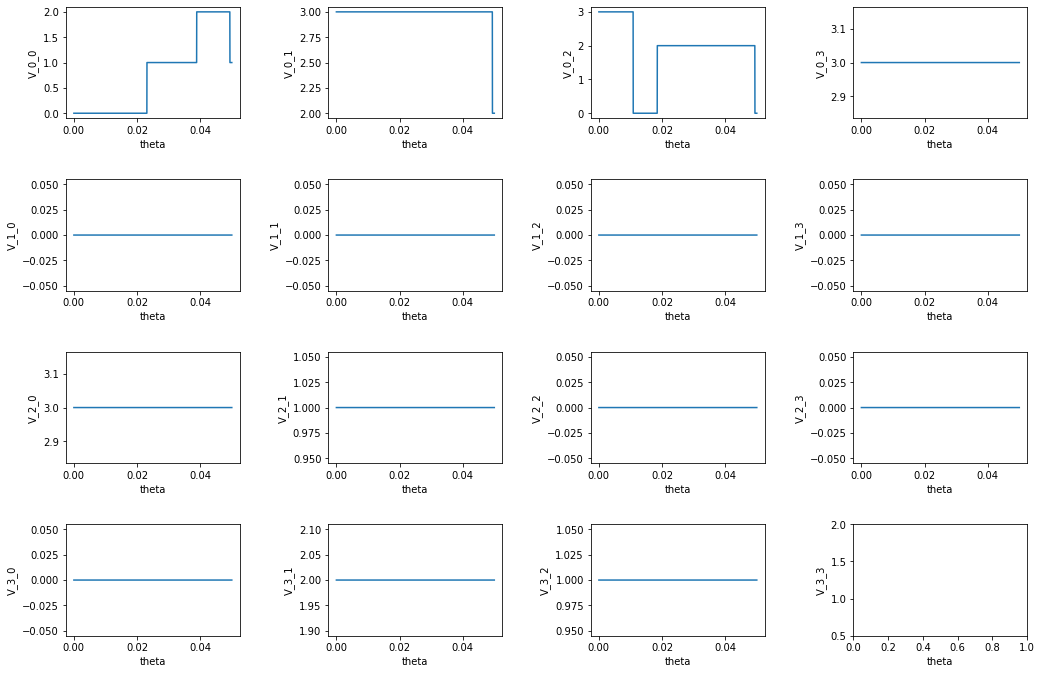

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer des graphiques pour suivre l'évolution de la politique sur chaque état

fig,axes = plt.subplots(4,4,figsize=(15,10))
column = 0
row = -1
for feature in df_theta_politique.columns:
  row = df_theta_politique.columns.get_loc(feature) 
  if column%4==0:
    column = 0
  sns.lineplot(data=df_theta_politique,x=df_theta_politique.index,y=feature,ax=axes[row//4,column])
  column +=1
  plt.tight_layout(pad=3.0)
plt.ylim(0.5,2)
plt.xlim(0,1,0.001)

## Observation : 
L'état V(0,2) est le dernier à se stabiliser. Cela se passe à pour theta environ 0.01. Cela dit qu'on peut s'attendre è une précision au plus de 2 place de décimale.

In [ ]:
# La Policy  pour theta = 0.01
V_limite,pi_limite = val_theta(theta=0.01,gamma=1.0, v = [0 for state in range(env.nS)])
df = pd.DataFrame(np.array(pi_limite).reshape(4,4))
df

,0,1,2,3
0,0,3,3,3
1,0,0,0,0
2,3,1,0,0
3,0,2,1,0


In [ ]:
# Les valueurs des états pour theta = 0.01 (pas nécéssairement optimale)
pd.DataFrame(np.array(V_limite).reshape(4,4))

,0,1,2,3
0,0.461601,0.388985,0.342935,0.320738
1,0.490462,0.000000,0.309148,0.000000
2,0.545602,0.622070,0.595832,0.000000
3,0.000000,0.739243,0.866875,0.000000


## Recherche des valeurs plus précises pour les états

In [ ]:
df_theta_precis = pd.DataFrame()
count = 0
for theta in np.linspace(0.001,0.00001,num=4000):
    count +=1
    V,pi = val_theta(theta,gamma=1.0, v = [0 for state in range(env.nS)])
    V = np.array(V).reshape(4,4)
    pi = np.array(pi).reshape(4,4)
    df_theta_precis.loc[count,"theta"] = theta
    for j in range(4):
        for k in range(4):
            df_theta_precis.loc[count,"V_{}_{}".format(j,k)] = V[j][k]

df_theta_precis.set_index("theta",inplace=True)
df_theta_precis.sort_index(ascending=False)

,V_0_0,V_0_1,V_0_2,V_0_3,V_1_0,V_1_1,V_1_2,V_1_3,V_2_0,V_2_1,V_2_2,V_2_3,V_3_0,V_3_1,V_3_2,V_3_3
theta,,,,,,,,,,,,,,,,
0.001000,0.800322,0.792546,0.787025,0.784161,0.802011,0.0,0.512821,0.0,0.805267,0.809852,0.752644,0.0,0.0,0.872641,0.936137,0.0
0.001000,0.800322,0.792546,0.787025,0.784161,0.802011,0.0,0.512821,0.0,0.805267,0.809852,0.752644,0.0,0.0,0.872641,0.936137,0.0
0.001000,0.800322,0.792546,0.787025,0.784161,0.802011,0.0,0.512821,0.0,0.805267,0.809852,0.752644,0.0,0.0,0.872641,0.936137,0.0
0.000999,0.800322,0.792546,0.787025,0.784161,0.802011,0.0,0.512821,0.0,0.805267,0.809852,0.752644,0.0,0.0,0.872641,0.936137,0.0
0.000999,0.800322,0.792546,0.787025,0.784161,0.802011,0.0,0.512821,0.0,0.805267,0.809852,0.752644,0.0,0.0,0.872641,0.936137,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000011,0.823270,0.823183,0.823122,0.823090,0.823289,0.0,0.529226,0.0,0.823326,0.823377,0.764571,0.0,0.0,0.882245,0.941120,0.0
0.000011,0.823277,0.823192,0.823132,0.823100,0.823295,0.0,0.529231,0.0,0.823330,0.823380,0.764574,0.0,0.0,0.882247,0.941122,0.0
0.000010,0.823283,0.823200,0.823141,0.823111,0.823301,0.0,0.529235,0.0,0.823335,0.823384,0.764578,0.0,0.0,0.882250,0.941123,0.0


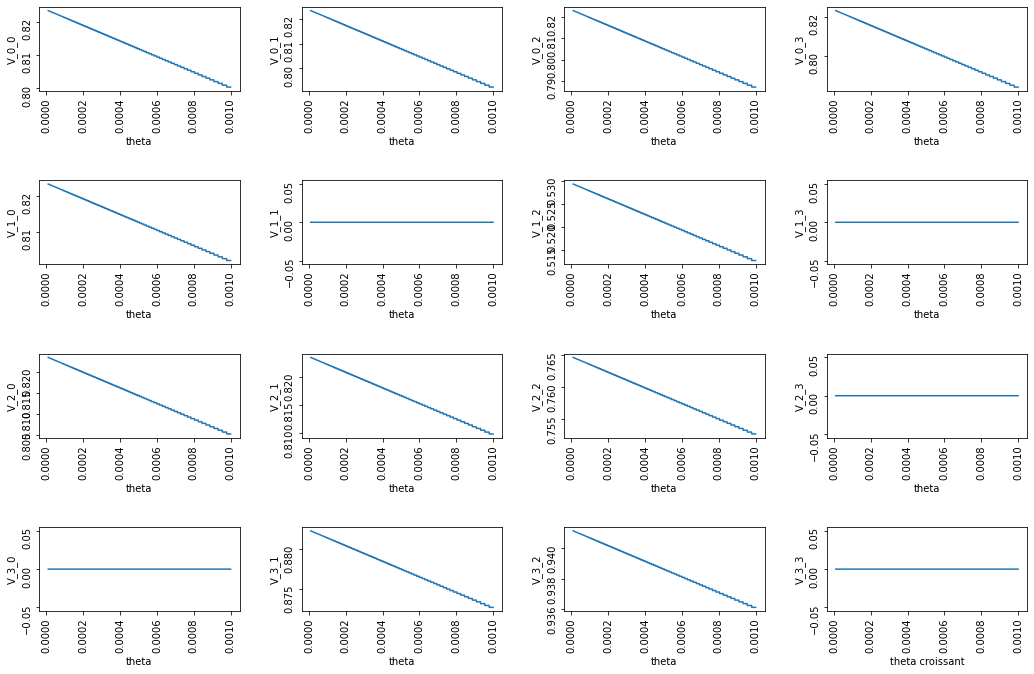

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(4,4,figsize=(15,10))
column = 0
row = -1
for feature in df_theta_precis.columns:
  row = df_theta_precis.columns.get_loc(feature) 
  if column%4==0:
    column = 0
  sns.lineplot(data=df_theta_precis,x=df_theta_precis.index,y=feature,ax=axes[row//4,column])
  axes[row//4,column].tick_params(labelrotation=90)
  plt.xlabel("theta croissant")
  column +=1 
  plt.tight_layout(pad=3.0)
  




# Zoom sur une graphe

Text(0.5, 0, 'theta croissant')

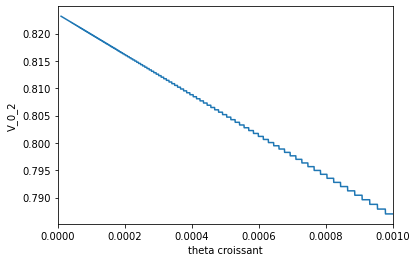

In [ ]:
sns.lineplot(data=df_theta_precis,x=df_theta_precis.index,y="V_0_2")
plt.xlim(0.00000,0.001)
plt.xlabel("theta croissant")

# Observations :
1. Dans le data frame on observe que les valeurs des états deviennent proches à deux places de décimales. Cependant, les graphiques ne montrent pas une stabilité établie. Les valeurs semblent toujours vouloir augmenter leur précision à trois, voire quatre places de décimale.
2. Si on veut une précision à une place de décimale on peut choisir theta = 0.0001. A partir de la on semble bouger vers une stabilité à deux places. On va le vérifier ci dessous.

# Valeurs optimales des états

# Choix 1: theta = 0.0001 pour une précision à une place de décimale

In [ ]:
V,pi = val_theta(theta=0.0001,gamma=1.0, v=[0 for state in range(env.nS)])

In [ ]:
# valeurs des etats
n = env.nA
pd.DataFrame(np.array(V).reshape(n,n))

,0,1,2,3
0,0.821166,0.820374,0.819811,0.819519
1,0.821338,0.000000,0.527722,0.000000
2,0.821670,0.822136,0.763477,0.000000
3,0.000000,0.881364,0.940663,0.000000


# Choix conservatrice: theta = 0.00001

In [ ]:
V,pi = val_theta(theta=0.00001,gamma=1.0, v=[0 for state in range(env.nS)])
n = env.nA
pd.DataFrame(np.array(V).reshape(n,n))

,0,1,2,3
0,0.823295,0.823216,0.823160,0.823131
1,0.823312,0.000000,0.529244,0.000000
2,0.823345,0.823391,0.764584,0.000000
3,0.000000,0.882255,0.941125,0.000000


# Observations :
1. On peut voir que les valeurs pour theta = 0.0001 et theta = 0.00001, s'accordent à deux places de décimales
2. On note que les valeurs obtenus ici sont très différent de l'approche 1, ou on a cherché un theta se basant sur la stabilité de la politique

# Policy optimale

In [ ]:
# Policy optimale
df = pd.DataFrame(np.array(pi).reshape(n,n))
df

,0,1,2,3
0,0,3,3,3
1,0,0,0,0
2,3,1,0,0
3,0,2,1,0


# Conclusions:

1. On a vu que le choix de theta peut se faire soit en se basant sur une stabilité de la polique ou sur une stabilité sur des valeurs des états pour une précision choisie.

2. On note que les valeurs pour **une stabilité de la politique** est atteint pour un **theta significativement plus bas** (theta = 0.01) contre un theta pour avoir **une précision sur la valeur de l'état (theta = 0.0001) pour deux places de décimales stables.**

3. **La politique dans les deux cas étaient les mêmes.**

4. Cepandant, les valeurs des états même s'ls ont maintenues leurs rangs relatifs en terme de grandeur (ce qui donne des politiques identiques), étaient quand même très différent, **confirmant que cela prend plus d'itérations pour une convergence de la valeur des états**.

5. Pour un robot, calculer des valuers moins précis prend moins de temps et si la politique est déjà  atteint avec une moins bonne précision, c'est peu souhaitable d'aller chercher des précisions extrêmes. Cependant, vu la différence entre les valeurs, on peut faire une balance et choisir une valeur de 0.001.

## Solution avec un theta proposé de 0.001

In [ ]:
V,pi = val_theta(theta=0.001,gamma=1.0, v=[0 for state in range(env.nS)])
n = env.nA
pd.DataFrame(np.array(V).reshape(n,n))

,0,1,2,3
0,0.800322,0.792546,0.787025,0.784161
1,0.802011,0.000000,0.512821,0.000000
2,0.805267,0.809852,0.752644,0.000000
3,0.000000,0.872641,0.936137,0.000000


# Politique optimale pour ce theta

In [ ]:
# Policy optimale
df = pd.DataFrame(np.array(pi).reshape(n,n))
df

,0,1,2,3
0,0,3,3,3
1,0,0,0,0
2,3,1,0,0
3,0,2,1,0


# Comparaison avec une solution ultra conservatrice

In [ ]:
V_cons,pi_cons = val_theta(theta=0.00001,gamma=1.0, v=[0 for state in range(env.nS)])
n = env.nA
pd.DataFrame(np.array(V_cons).reshape(n,n))

,0,1,2,3
0,0.823295,0.823216,0.823160,0.823131
1,0.823312,0.000000,0.529244,0.000000
2,0.823345,0.823391,0.764584,0.000000
3,0.000000,0.882255,0.941125,0.000000


In [ ]:
# Policy optimale
df = pd.DataFrame(np.array(pi_cons).reshape(n,n))
df

,0,1,2,3
0,0,3,3,3
1,0,0,0,0
2,3,1,0,0
3,0,2,1,0
